In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as asc
from sklearn import model_selection
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


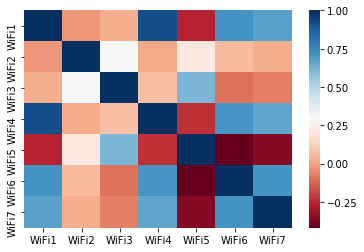

In [2]:
#Importing data from csv file
data = pd.read_csv("data_knock_off.csv")
features = data.drop(["Room"],axis=1)

#Finding the correlation between features
corr = features.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

# Imputing Using KNN Regression


In [3]:
from sklearn.neighbors import KNeighborsRegressor
Xt = data.drop(["Room"],axis=1)
imp = IterativeImputer(estimator = KNeighborsRegressor(n_neighbors=15),max_iter=20, random_state=0)
imp.fit(Xt)

C:\Users\SUDIP WALTER THOMAS\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:599: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


IterativeImputer(add_indicator=False,
                 estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                               metric='minkowski',
                                               metric_params=None, n_jobs=None,
                                               n_neighbors=15, p=2,
                                               weights='uniform'),
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=20, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, tol=0.001, verbose=0)

In [4]:
features = pd.DataFrame(imp.transform(Xt), columns = ['WiFi1','WiFi2','WiFi3','WiFi4','WiFi5','WiFi6','WiFi7'])
df = features
df["Room"] = data.Room
y = data.Room
df.head()

,WiFi1,WiFi2,WiFi3,WiFi4,WiFi5,WiFi6,WiFi7,Room
0,-64.000000,-56.0,-61.000000,-66.0,-71.0,-82.0,-81.0,1
1,-62.266667,-57.0,-61.000000,-65.0,-71.0,-85.0,-85.0,1
2,-63.000000,-60.0,-62.933333,-67.0,-76.0,-85.0,-84.0,1
3,-65.066667,-60.0,-68.000000,-62.0,-77.0,-90.0,-80.0,1
4,-64.800000,-65.0,-60.000000,-63.0,-77.0,-81.0,-87.0,1


In [5]:
X=df.iloc[:,:-1].values
y=df.iloc[:,7].values
y = label_binarize(y, classes=[1,2,3,4])

In [6]:
# Splitting into test and train data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

# Classification Using Decision Trees
# Hyperparameter Tuning 

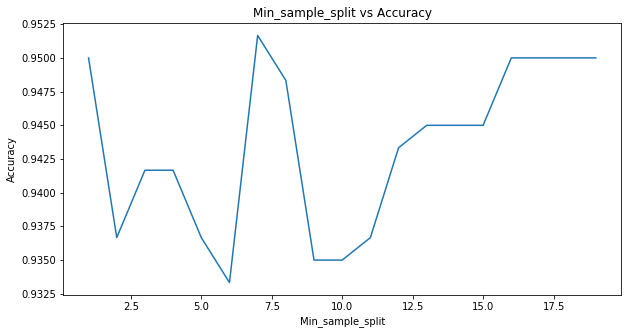

no. of splits vs Accuracy
[[ 1.          0.95      ]
 [ 2.          0.93666667]
 [ 3.          0.94166667]
 [ 4.          0.94166667]
 [ 5.          0.93666667]
 [ 6.          0.93333333]
 [ 7.          0.95166667]
 [ 8.          0.94833333]
 [ 9.          0.935     ]
 [10.          0.935     ]
 [11.          0.93666667]
 [12.          0.94333333]
 [13.          0.945     ]
 [14.          0.945     ]
 [15.          0.945     ]
 [16.          0.95      ]
 [17.          0.95      ]
 [18.          0.95      ]
 [19.          0.95      ]]


In [7]:
# By changing the min_sample_split
acu1 = []
splits =[]
for i in range(1,20):
    # Create Decision Tree classifer object
    clf_dt1 = DecisionTreeClassifier(criterion="gini", min_samples_split=i)

    # Train Decision Tree Classifer
    clf_dt1 = clf_dt1.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = clf_dt1.predict(X_test)
    splits.append(i)
    acu1.append(metrics.accuracy_score(y_test, y_pred))
plt.figure(figsize = (10,5))
plt.plot(splits,acu1)
plt.xlabel("Min_sample_split")
plt.ylabel("Accuracy")
plt.title("Min_sample_split vs Accuracy")
plt.show()
a = np.asmatrix(splits)
b = np.asmatrix(acu1)
output = np.stack((a,b))
print('no. of splits vs Accuracy')
print(output.transpose())

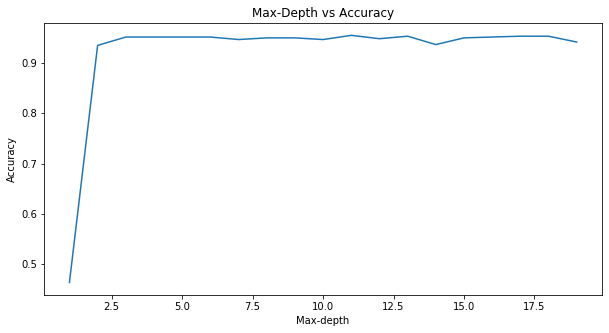

Maximum Depth vs Accuracy
[[ 1.          0.46333333]
 [ 2.          0.935     ]
 [ 3.          0.95166667]
 [ 4.          0.95166667]
 [ 5.          0.95166667]
 [ 6.          0.95166667]
 [ 7.          0.94666667]
 [ 8.          0.95      ]
 [ 9.          0.95      ]
 [10.          0.94666667]
 [11.          0.955     ]
 [12.          0.94833333]
 [13.          0.95333333]
 [14.          0.93666667]
 [15.          0.95      ]
 [16.          0.95166667]
 [17.          0.95333333]
 [18.          0.95333333]
 [19.          0.94166667]]


In [8]:
#By changing the max_depth
acu2 = []
dep =[]
for i in range(1,20):
    # Create Decision Tree classifer object
    clf_dt2 = DecisionTreeClassifier(criterion="gini", max_depth=i)

    # Train Decision Tree Classifer
    clf_dt2 = clf_dt2.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = clf_dt2.predict(X_test)
    dep.append(i)
    acu2.append(metrics.accuracy_score(y_test, y_pred))
plt.figure(figsize = (10,5))
plt.plot(dep,acu2)
plt.xlabel("Max-depth")
plt.ylabel("Accuracy")
plt.title("Max-Depth vs Accuracy")
plt.show()
a = np.asmatrix(dep)
b = np.asmatrix(acu2)
output = np.stack((a,b))
print('Maximum Depth vs Accuracy')
print(output.transpose())

# Printing accuracy for best model


In [9]:
if max(acu2)>max(acu1):
    i = acu2.index(max(acu2))
    clf_dt = DecisionTreeClassifier(criterion = 'gini', max_depth = dep[i])
    clf_dt = clf_dt.fit(X_train,y_train)
    #Predicting results using testing data
    y_pred_dt = clf_dt.predict(X_test)
else:
    i = acu1.index(max(acu1))
    clf_dt = DecisionTreeClassifier(criterion = 'gini', min_samples_split = splits[i])
    clf_dt = clf.fit(X_train,y_train)
    #Predicting results using testing data
    y_pred_dt = clf_dt.predict(X_test)

#Creating confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_dt.argmax(axis=1))
#Printing accuracy
print(f"Accuracy: {asc(y_pred_dt, y_test)}")
print(("\nConfusion Matrix:"))
print(cm)


Accuracy: 0.9533333333333334

Confusion Matrix:
[[135   0   1   6]
 [  0 149   8   0]
 [  2   7 134   3]
 [  0   0   1 154]]


# ROC and AUC for Decision Tree

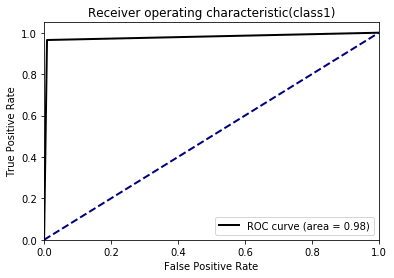

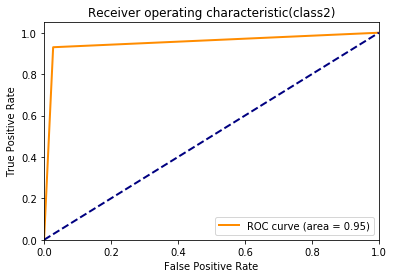

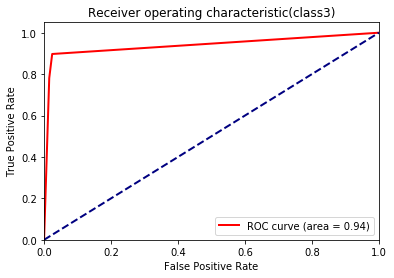

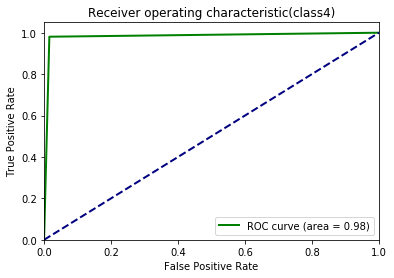

In [10]:
classifier = OneVsRestClassifier(clf_dt)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

#Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#plotting ROC curve and AUC
plt.figure()
lw = 2
for i in range(4):
    color = ['k','darkorange','r','g']
    plt.plot(fpr[i], tpr[i], color=color[i],
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic(class{i+1})')
    plt.legend(loc="lower right")
    plt.show()

# Classification using SVM


In [11]:
from sklearn.svm import SVC
clf_svm = SVC(kernel = 'rbf')
clf_svm.fit(X_train, y_train.argmax(axis=1))

# Predicting the test set result
y_pred_svm = clf_svm.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_svm)

print(f"Accuracy: {asc(y_pred_svm, y_test.argmax(axis=1))}")
print(("\nConfusion Matrix:"))
print(cm)

C:\Users\SUDIP WALTER THOMAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.7916666666666666

Confusion Matrix:
[[106  34   0   2]
 [  0 157   0   0]
 [  0  47  98   1]
 [  0  40   1 114]]


# ROC and AUC for SVM

C:\Users\SUDIP WALTER THOMAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SUDIP WALTER THOMAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SUDIP WALTER THOMAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SUDIP WALTER THOMAS\Anaconda

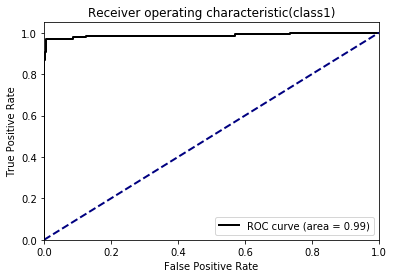

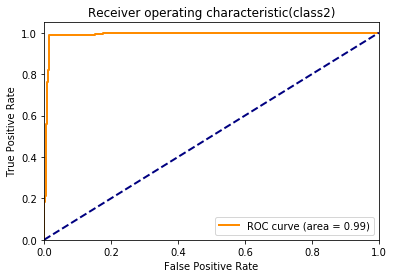

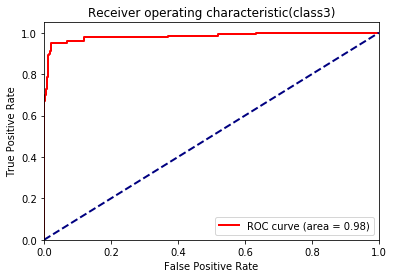

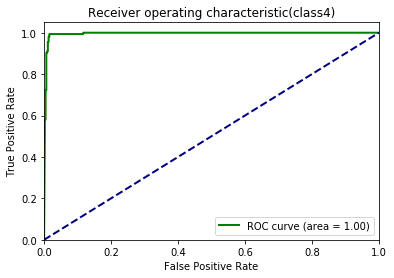

In [12]:
classifier = OneVsRestClassifier(SVC(kernel='rbf',probability = True))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

#Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#plotting ROC curve and AUC
plt.figure()
lw = 2
for i in range(4):
    color = ['k','darkorange','r','g']
    plt.plot(fpr[i], tpr[i], color=color[i],
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic(class{i+1})')
    plt.legend(loc="lower right")
    plt.show()    

# Classification using LDA

In [13]:
# Create model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X_train, y_train.argmax(axis=1))

# Predicting the test set result
y_pred_lda = clf_lda.predict(X_test)
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_lda)

print(f"Accuracy: {asc(y_pred_lda, y_test.argmax(axis=1))}")
print(("\nConfusion Matrix:"))
print(cm)

Accuracy: 0.96

Confusion Matrix:
[[138   0   2   2]
 [  0 141  16   0]
 [  1   0 143   2]
 [  0   0   1 154]]


# ROC and AUC for LDA

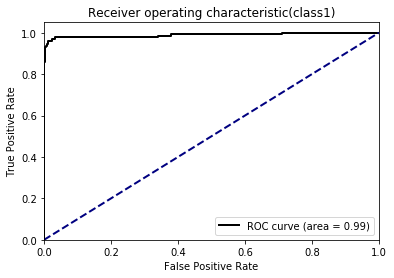

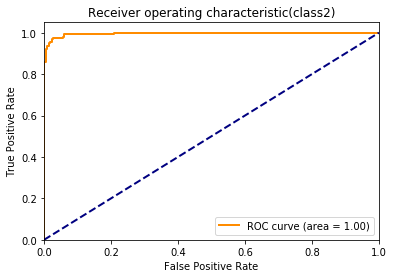

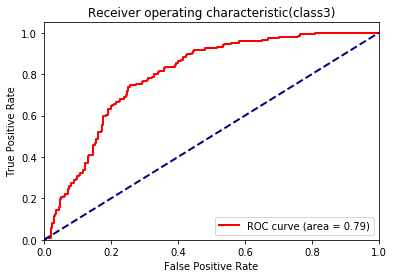

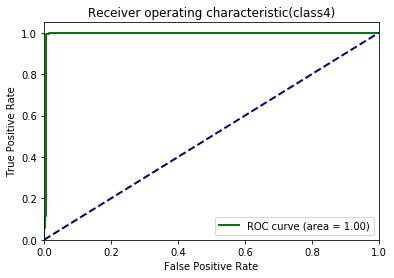

In [14]:
classifier = OneVsRestClassifier(clf_lda)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

#Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#plotting ROC curve and AUC
plt.figure()
lw = 2
for i in range(4):
    color = ['k','darkorange','r','g']
    plt.plot(fpr[i], tpr[i], color=color[i],
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic(class{i+1})')
    plt.legend(loc="lower right")
    plt.show()

# Classification using QDA

In [15]:
# Create model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf_qda = QuadraticDiscriminantAnalysis()
clf_qda.fit(X_train, y_train.argmax(axis=1))

# Predicting the test set result
y_pred_qda = clf_qda.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_qda)

print(f"Accuracy: {asc(y_pred_qda, y_test.argmax(axis=1))}")
print(("\nConfusion Matrix:"))
print(cm)

Accuracy: 0.9733333333333334

Confusion Matrix:
[[139   0   1   2]
 [  0 152   5   0]
 [  1   2 139   4]
 [  0   0   1 154]]


# ROC and AUC for QDA


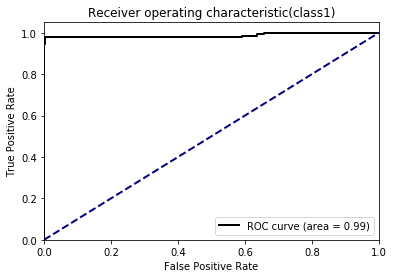

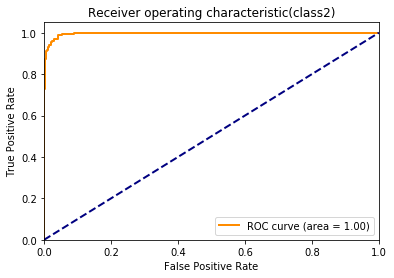

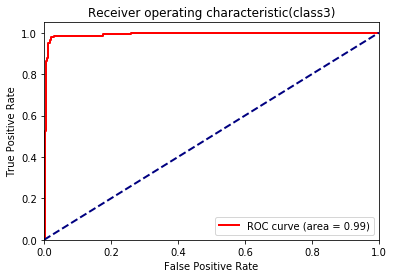

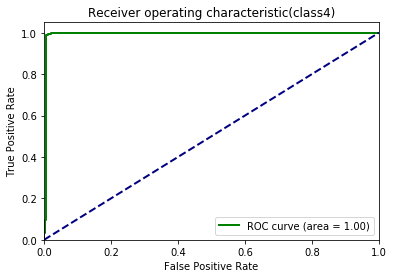

In [16]:
classifier = OneVsRestClassifier(clf_qda)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

#Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#plotting ROC curve and AUC
plt.figure()
lw = 2
for i in range(4):
    color = ['k','darkorange','r','g']
    plt.plot(fpr[i], tpr[i], color=color[i],
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic(class{i+1})')
    plt.legend(loc="lower right")
    plt.show()

# Classification using KNN


  K Value vs Accuracy
[[ 1.          0.96      ]
 [ 2.          0.96      ]
 [ 3.          0.97      ]
 [ 4.          0.97666667]
 [ 5.          0.97333333]
 [ 6.          0.97166667]
 [ 7.          0.97333333]
 [ 8.          0.975     ]
 [ 9.          0.97666667]
 [10.          0.975     ]
 [11.          0.97333333]
 [12.          0.97      ]
 [13.          0.96666667]
 [14.          0.97      ]
 [15.          0.96666667]
 [16.          0.96833333]
 [17.          0.96833333]
 [18.          0.96833333]
 [19.          0.96666667]
 [20.          0.96833333]
 [21.          0.96666667]]


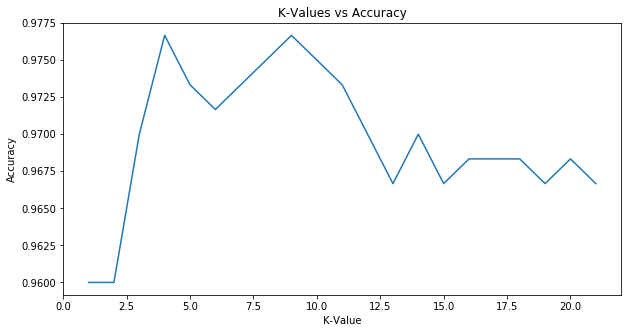

In [17]:
# Create model
from sklearn.neighbors import KNeighborsClassifier
k_val = []
acu_val = []
for k in range(1,22):
    clf_knn = KNeighborsClassifier(n_neighbors = k)
    clf_knn.fit(X_train, y_train.argmax(axis=1))
    y_pred_knn = clf_knn.predict(X_test)
    k_val.append(k)
    acu = asc(y_pred_knn, y_test.argmax(axis=1))
    acu_val.append(acu)
a = np.asmatrix(k_val)
b = np.asmatrix(acu_val)
output = np.stack((a,b))
print('  K Value vs Accuracy')
print(output.transpose())
# Plotting K-value vs Accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(k_val,acu_val)
plt.xlabel("K-Value")
plt.ylabel("Accuracy")
plt.title("K-Values vs Accuracy")
plt.show()

# Finding best model 

In [18]:
i = acu_val.index(max(acu_val))
clf_knn = KNeighborsClassifier(n_neighbors = k_val[i])
clf_knn.fit(X_train, y_train.argmax(axis=1))
y_pred_knn = clf_knn.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_knn)
print(f"Accuracy: {asc(y_pred_knn, y_test.argmax(axis=1))}")
print(("\nConfusion Matrix:"))
print(cm)

Accuracy: 0.9766666666666667

Confusion Matrix:
[[139   0   1   2]
 [  0 155   2   0]
 [  2   4 138   2]
 [  0   0   1 154]]


# ROC and AUC for KNN


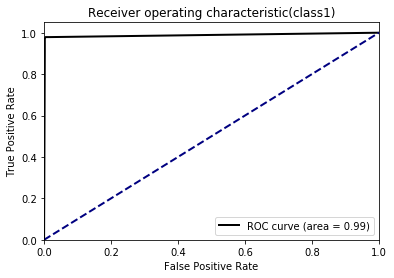

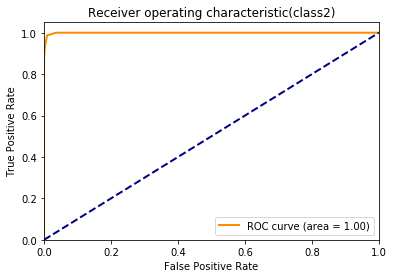

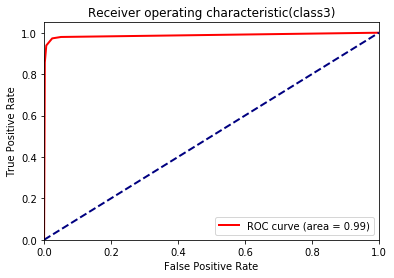

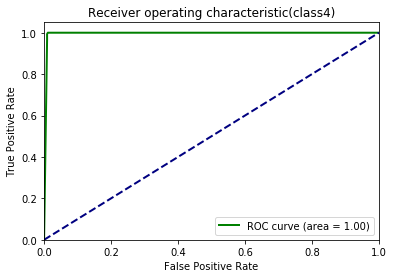

In [19]:
classifier = OneVsRestClassifier(clf_knn)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

#Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#plotting ROC curve and AUC
plt.figure()
lw = 2
for i in range(4):
    color = ['k','darkorange','r','g']
    plt.plot(fpr[i], tpr[i], color=color[i],
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic(class{i+1})')
    plt.legend(loc="lower right")
    plt.show()

# K-Fold Cross Validation for model with best accuracy

In [20]:
a=0
for i in range(2,500):
    scores_res = model_selection.cross_val_score(clf_knn, X, y.argmax(axis=1), cv=i)
    if a < scores_res.mean():
        a = scores_res.mean()
        j=i
print(f'Max accuracy = {a}, coooresponding to K value of = {j}')

Max accuracy = 0.9779624277456648, coooresponding to K value of = 346
